# The Oscars
## General Information
Author: Patrick McNamee

Date: 12/17/2019

## Description

This notebook is a reinvestigation of the data presented in Week 5 Regression with an emphasis in data visualization. There are two investigations, the firest being the scores of the game with locations within the year as sorted by month. The other investigation is a pairwise look into the cross correlation between the scores and the SPI rating of the two teams.

## Data Investigation
### Score Distribution

The first thing to do is to load the data into a dataframe and then use the seaborn library for plotting. A histogram is shown with a count ot give an idea of the data being investigated.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
sns.set(style="ticks", color_codes=True)
%matplotlib inline

df = pd.read_csv(r'./data/training_set.csv')
print(df.columns)

Index(['Unnamed: 0', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'importance1', 'importance2',
       'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'year', 'month',
       'day', 'avg_spi', 'delta_spi', 'avg_score', 'delta_score',
       'avg_importance', 'delta_importance'],
      dtype='object')


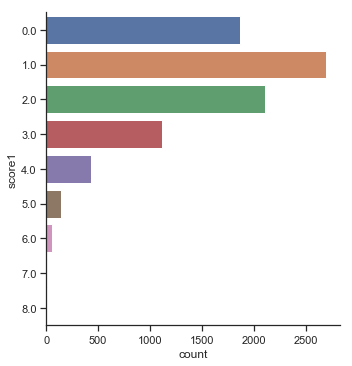

In [5]:
sns.catplot(y="score1", kind="count", data=df)

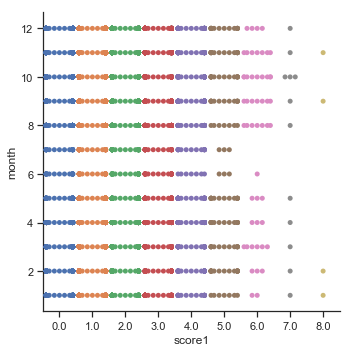

In [2]:
sns.catplot(x="score1", y="month", kind="swarm", data=df)

A noticable pattern is that June and July (months 6 and 7) have little to no games beyond a score of 5. A possible explanation for this is that June and July are likely the months of playoffs or championships and so the quality of games is higher and so the score is lower. Another comment is that a PK shootout is likely to contribute to the scores of the match which is likely to contribute to games with scores higher than 2 appearing. Its currently unclear as to the number of games a shootout would influence so it is hard to estimate its effect.

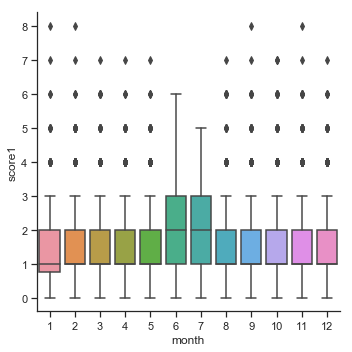

In [3]:
sns.catplot(x="month", y="score1", kind="box", data=df)

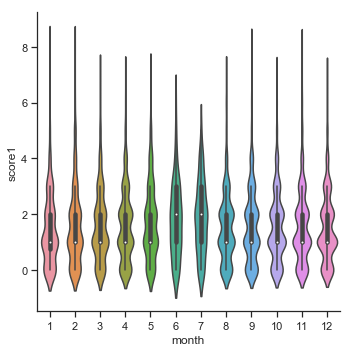

In [4]:
sns.catplot(x="month", y="score1", kind="violin", data=df)

Both the violin plots and box plots give an indication of June and July being months for championships or championship playoffs. It is also interesting to note the the distribution becomes much more uniform aournd these months as well, which indicates that score for two very equally matched games is highly random. Note from the box plot that games with scores of 4 or more ar anomolies in months other June or July wiht games having a median score of 1. The median does significantly jump to 2 during June and July though.

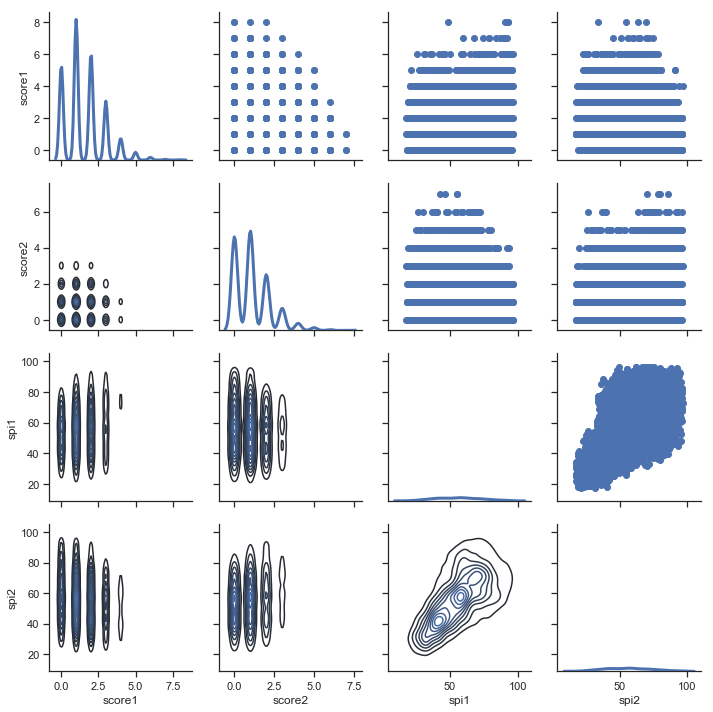

In [6]:
dfsubset = df[['score1', 'score2', 'spi1', 'spi2']]

g = sns.PairGrid(dfsubset)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

The pairwise plotting 